## Noise band frequency 

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
#path="/home/sultan/EEG/Source_Level_Analysis/Baseline_100sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/Baseline_100sam_10ms_noise_all_erp.csv"
dataset =pd.read_csv(path)

In [3]:
rs=47;
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100],'gamma':[0.01,0.0147, 0.016, 0.019,0.029]}

In [4]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [6]:
X_test.shape, y_test.shape

((361, 1428), (361,))

In [7]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([148, 213]))

# Whole brain

In [8]:
nstep=(X_train.shape[1]/68)
k=0;j=68; acgw=[];pmw=[];aucw=[];
for i in range(0,nstep):
    cv=5
#     from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    print (i*10);
    print ("Accuracy:",acc)
    perf=classification_report(y_test, pred)
    pmw.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    aucw.append(roc_auc)
    print ("ROC", roc_auc)
    print (perf)
    print (k,j)
    k=k+68;j=j+68;
#     scores=clf.cv_results_['mean_test_score']
#     print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

0
('Accuracy:', 0.590027700831025)
('ROC', 0.5)
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       148
        1.0       0.59      1.00      0.74       213

avg / total       0.35      0.59      0.44       361

(0, 68)


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


10
('Accuracy:', 0.7063711911357341)
('ROC', 0.6831303134120036)
             precision    recall  f1-score   support

        0.0       0.67      0.55      0.61       148
        1.0       0.72      0.81      0.77       213

avg / total       0.70      0.71      0.70       361

(68, 136)
20
('Accuracy:', 0.6731301939058172)
('ROC', 0.6508374571754852)
             precision    recall  f1-score   support

        0.0       0.62      0.53      0.57       148
        1.0       0.70      0.77      0.74       213

avg / total       0.67      0.67      0.67       361

(136, 204)
30
('Accuracy:', 0.739612188365651)
('ROC', 0.723670853952544)
             precision    recall  f1-score   support

        0.0       0.70      0.64      0.67       148
        1.0       0.76      0.81      0.79       213

avg / total       0.74      0.74      0.74       361

(204, 272)
40
('Accuracy:', 0.7257617728531855)
('ROC', 0.7057480015226494)
             precision    recall  f1-score   support

        0.0

# Hemisphrere analysis

## LH

In [9]:
# only 34 features 
# parameters = {'kernel':['rbf'], 'C':[1, 10,20,30,70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,2/5508.0,1/5508.0]}
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
svc = svm.SVC()
k=0;j=34; acgr=[];aucrh=[];pmrh=[];
for i in range(0,nstep):
    cv=5
#     from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    print (i*10)
    print ("Accuracy:", acc)
    perf=classification_report(y_test, pred)
    pmrh.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    aucrh.append(roc_auc)
    print ("ROC:", roc_auc)
    print (perf)
#     print("Con:",confusion_matrix(y_test, pred))
    print (k,j)
    k=k+34;j=j+34;

0
('Accuracy:', 0.590027700831025)
('ROC:', 0.5)
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       148
        1.0       0.59      1.00      0.74       213

avg / total       0.35      0.59      0.44       361

(0, 34)
10
('Accuracy:', 0.7119113573407202)
('ROC:', 0.7074133993148077)
             precision    recall  f1-score   support

        0.0       0.64      0.68      0.66       148
        1.0       0.77      0.73      0.75       213

avg / total       0.72      0.71      0.71       361

(34, 68)
20
('Accuracy:', 0.6592797783933518)
('ROC:', 0.6391003679736074)
             precision    recall  f1-score   support

        0.0       0.60      0.53      0.56       148
        1.0       0.70      0.75      0.72       213

avg / total       0.65      0.66      0.66       361

(68, 102)
30
('Accuracy:', 0.7229916897506925)
('ROC:', 0.727112676056338)
             precision    recall  f1-score   support

        0.0       0.64      

# RH

In [10]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
k=0;j=34; acgl=[];auclh=[];pmlh=[];
for i in range(0,nstep):
    cv=5
#     from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]} 
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    print (i*10)
    print ("Accuracy:", acc)
    perf=classification_report(y_test, pred)
    pmlh.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    auclh.append(roc_auc)
    print ("ROC:", roc_auc)
    print perf
#     print("Con:",confusion_matrix(y_test, pred))
    print (k,j)
    k=k+34;j=j+34;

0
('Accuracy:', 0.590027700831025)
('ROC:', 0.5)
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       148
        1.0       0.59      1.00      0.74       213

avg / total       0.35      0.59      0.44       361

(0, 34)
10
('Accuracy:', 0.6620498614958449)
('ROC:', 0.6424787463519858)
             precision    recall  f1-score   support

        0.0       0.60      0.53      0.56       148
        1.0       0.70      0.75      0.72       213

avg / total       0.66      0.66      0.66       361

(34, 68)
20
('Accuracy:', 0.6814404432132964)
('ROC:', 0.6568487501586093)
             precision    recall  f1-score   support

        0.0       0.64      0.52      0.57       148
        1.0       0.70      0.79      0.75       213

avg / total       0.68      0.68      0.67       361

(68, 102)
30
('Accuracy:', 0.6869806094182825)
('ROC:', 0.6811318360614136)
             precision    recall  f1-score   support

        0.0       0.61     

In [19]:
t=np.linspace(0,200,21, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [20]:
np.max(a)

time   0    200.000000
Whole  0      0.781163
LH     0      0.772853
RH     0      0.753463
dtype: float64

In [21]:
a

,time,Whole,LH,RH
,0,0,0,0
0,0.0,0.590028,0.590028,0.590028
1,10.0,0.706371,0.662050,0.711911
2,20.0,0.673130,0.681440,0.659280
3,30.0,0.739612,0.686981,0.722992
4,40.0,0.725762,0.703601,0.714681
5,50.0,0.747922,0.714681,0.736842
6,60.0,0.745152,0.709141,0.739612
7,70.0,0.722992,0.703601,0.664820
8,80.0,0.781163,0.725762,0.686981


# Writing the csv data all

In [24]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_baseline_100sam_10ms_noise_v47.csv')
wpath+'svm_baseline_100sam_10ms_noise_v47.csv'

'/home/sultan/EEG/Source_Level_Analysis/SVM_results/svm_baseline_100sam_10ms_noise_v47.csv'

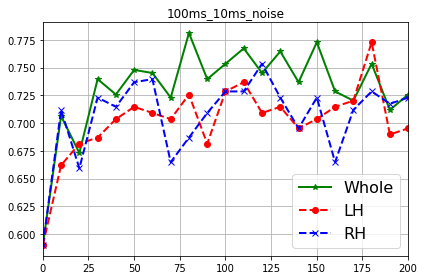

In [23]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("100ms_10ms_noise")
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
# plt.xlabel('Time (ms)',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
# plt.yticks(**axis_font)
# plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

# STOPPPPPPPPPPPPPP

In [16]:
X_train.shape

(1443, 714)

In [17]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v2.csv')

In [18]:
2.0/68
rs

47